# Importing Libraries

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras import datasets, layers, models

# Load the MNIST Data and Pre-Processing the Images

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28, 1)
y_train shape (60000,)
X_test shape (10000, 28, 28, 1)
y_test shape (10000,)


# Visualization of Random Images in the Dataset

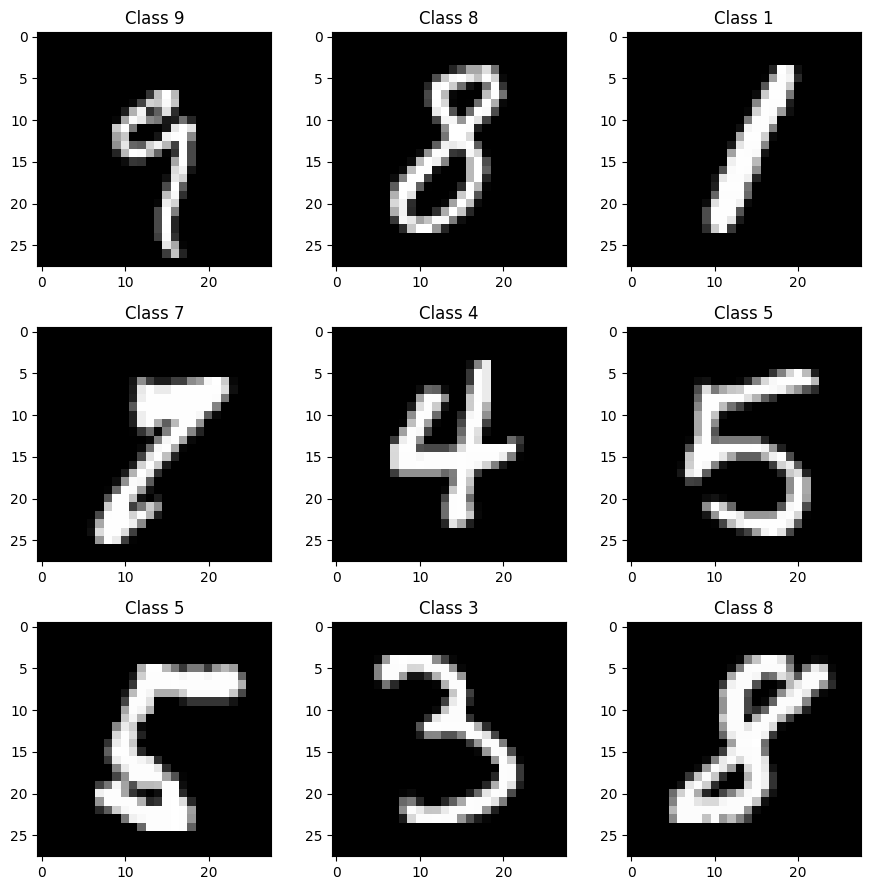

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

# Training Pipeline

In [ ]:
nb_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [ ]:
INPUT_SHAPE = x_train.shape[1:]
nb_classes = 10
BATCH_SIZE = 16
NUM_EPOCHS = 10

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(nb_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 64)                495680    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.1)

Epoch 1/10
3375/3375 [==============================] - 27s 4ms/step - loss: 0.1097 - accuracy: 0.9666 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 2/10
3375/3375 [==============================] - 14s 4ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 3/10
3375/3375 [==============================] - 14s 4ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 4/10
3375/3375 [==============================] - 13s 4ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0338 - val_accuracy: 0.9917
Epoch 5/10
3375/3375 [==============================] - 14s 4ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0430 - val_accuracy: 0.9902
Epoch 6/10
3375/3375 [==============================] - 15s 4ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0604 - val_accuracy: 0.9863
Epoch 7/10
3375/3375 [==============================] - 15s 4ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0483 - val_ac

# Training and Validation Metrics Plots

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Testing Results

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)